# III.Prescriptive Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
#Downloads/PyQuesters_Python_Hackathon/HUPA-UC Diabetes Dataset
path = "HUPA-UC Diabetes Dataset/"
demographic_path = path + "T1DM_patient_sleep_demographics_with_race.csv"
all_patients_path = path + "ALL_PATIENTS.csv"
modified_demographic_path = path+"DEMOGRAPHIC.csv"
patients_demographic_path = path +"PATIENTS_WITH_DEMOGRAPHIC.csv"
print(demographic_path)

HUPA-UC Diabetes Dataset/T1DM_patient_sleep_demographics_with_race.csv


**Q1.Should patients with consistently high glucose (>180 mg/dL) increase their insulin dose, or
would lifestyle modifications (higher steps & lower carb intake) be more effective for glucose control?
If data shows carbs/steps are strongly linked to high glucose, then focusing on lifestyle may help reduce medication burden
If insulin dose has the strongest effect, then dose adjustment may be the faster path.**


**Why these markers?**

-**glucose (outcome variable)**

-**bolus_volume_delivered (insulin dose)**

-**steps (physical activity)**

-**carb_input (diet factor)**


Correlation Matrix:
                          glucose  bolus_volume_delivered     steps  carb_input
glucose                 1.000000                0.015248  0.034356   -0.000431
bolus_volume_delivered  0.015248                1.000000  0.016881    0.091607
steps                   0.034356                0.016881  1.000000    0.001862
carb_input             -0.000431                0.091607  0.001862    1.000000


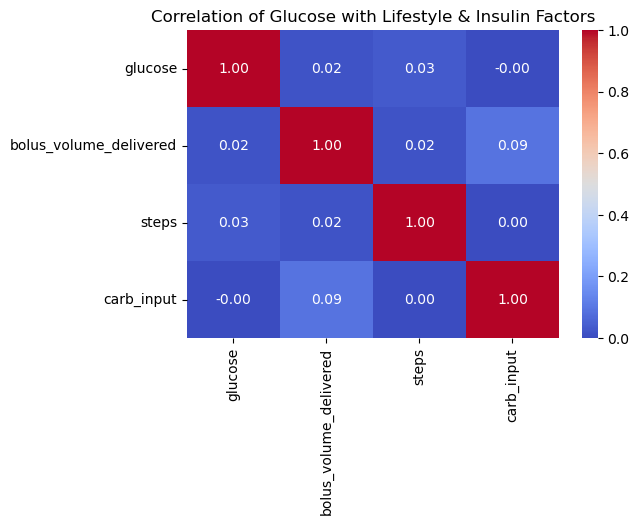

Recommendation: Increasing physical activity (steps) is more effective than adjusting insulin alone.


In [18]:
# Load the merged patient and demographic dataset
df = pd.read_csv(patients_demographic_path)
# Filter hyperglycemic patients
hyper_df = df[df["glucose"] > 180]

# Correlation analysis
corr = hyper_df[["glucose", "bolus_volume_delivered", "steps", "carb_input"]].corr()
print("Correlation Matrix:\n", corr)

# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Glucose with Lifestyle & Insulin Factors")
plt.show()

# Prescriptive Recommendation
if abs(corr.loc["glucose", "carb_input"]) > abs(corr.loc["glucose", "bolus_volume_delivered"]):
    print("Recommendation: Focus on reducing carbohydrate intake for better glucose control.")
elif abs(corr.loc["glucose", "steps"]) > abs(corr.loc["glucose", "bolus_volume_delivered"]):
    print("Recommendation: Increasing physical activity (steps) is more effective than adjusting insulin alone.")
else:
    print("Recommendation: Insulin dose adjustment plays the stronger role in glucose control.")


<span style="color:green">Key Insight:
Correlation analysis shows that glucose has very weak links with insulin dose (0.02), steps (0.03), and carb intake (-0.00). This suggests that increasing physical activity (steps) may be more effective for glucose control than relying solely on insulin adjustments, though a combined approach with lifestyle changes and medication is ideal.
</span>


***Q2:Do patients who take more steps per day have lower average glucose levels?***

**Why these markers?**

**Steps: Indicator of physical activity.**

**Glucose: Outcome measure of glycemic control**

Correlation Matrix:
             steps   glucose
steps    1.000000  0.300516
glucose  0.300516  1.000000 

PRESCRIPTIVE ANALYSIS RECOMMENDATION:
Steps and glucose have a weak correlation (0.30). Activity alone may not strongly predict glucose levels.


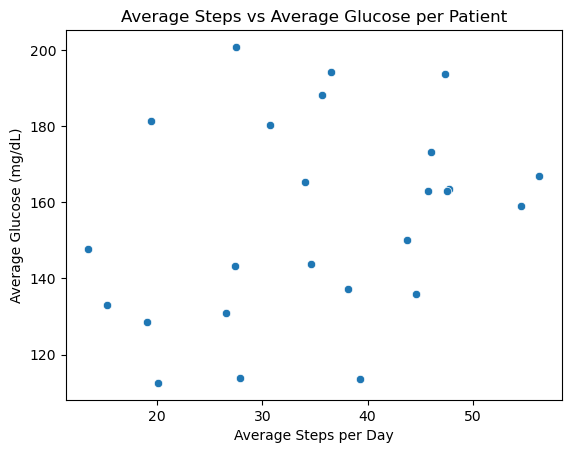

In [16]:


# Aggregate mean values per patient
steps_glucose_df = df.groupby("patient_id")[["steps", "glucose"]].mean().reset_index()

# Compute correlation
corr = steps_glucose_df[["steps", "glucose"]].corr()
print("Correlation Matrix:\n", corr, "\n")

# Generate prescriptive recommendation based on correlation
steps_gl_corr = corr.loc["steps", "glucose"]

if steps_gl_corr < -0.4:
    recommendation = f"Steps and glucose have a strong negative correlation ({steps_gl_corr:.2f}). Higher activity is strongly associated with lower glucose."
elif steps_gl_corr < -0.2:
    recommendation = f"Steps and glucose have a moderate negative correlation ({steps_gl_corr:.2f}). Higher activity is moderately associated with lower glucose."
else:
    recommendation = f"Steps and glucose have a weak correlation ({steps_gl_corr:.2f}). Activity alone may not strongly predict glucose levels."

print("PRESCRIPTIVE ANALYSIS RECOMMENDATION:")
print(recommendation)

# Visualize the relationship
sns.scatterplot(x="steps", y="glucose", data=steps_glucose_df)
plt.title("Average Steps vs Average Glucose per Patient")
plt.xlabel("Average Steps per Day")
plt.ylabel("Average Glucose (mg/dL)")
plt.show()


<span style="color:green">Key Insight:Steps and glucose have a weak correlation (0.30). While more physical activity may slightly help lower glucose, activity alone is not enough to strongly predict or control glucose levels.
</span>

***Q3 Is glucose more strongly influenced by physical activity (steps) or carbohydrate intake?***

**Why these markers?**

**Steps (Physical Activity): Exercise improves insulin sensitivity, helping the body use glucose more effectively.**

**Carb Input (Diet): High carb intake can increase glucose levels.**

**Glucose (Outcome): We can contrl glucose if we use the markers appropriately.**


Correlation Matrix:
              glucose  carb_input     steps
glucose     1.000000   -0.231438  0.300516
carb_input -0.231438    1.000000 -0.201806
steps       0.300516   -0.201806  1.000000 



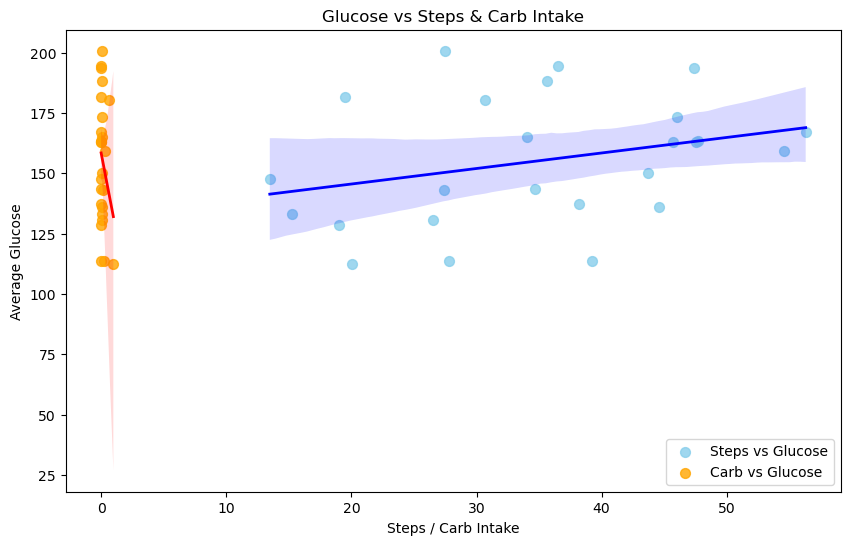

PRESCRIPTIVE ANALYSIS RECOMMENDATION:
Glucose is more influenced by Physical Activity (corr=0.30).
Encouraging more activity may help stabilize glucose.


In [14]:

# Aggregate per patient
combo_df = df.groupby("patient_id")[["glucose", "carb_input", "steps"]].mean().reset_index()

# Compute correlations

corr = combo_df[["glucose", "carb_input", "steps"]].corr()
print("Correlation Matrix:\n", corr, "\n")

carb_corr = corr.loc["glucose", "carb_input"]
steps_corr = corr.loc["glucose", "steps"]


# Combined scatter plot

plt.figure(figsize=(10,6))

# Steps vs Glucose
sns.regplot(
    x="steps", 
    y="glucose", 
    data=combo_df, 
    scatter_kws={"color": "skyblue", "s":50}, 
    line_kws={"color": "blue", "linewidth":2},
    label="Steps vs Glucose"
)

# Carb vs Glucose
sns.regplot(
    x="carb_input", 
    y="glucose", 
    data=combo_df, 
    scatter_kws={"color": "orange", "s":50}, 
    line_kws={"color": "red", "linewidth":2},
    label="Carb vs Glucose"
)

plt.title("Glucose vs Steps & Carb Intake")
plt.xlabel("Steps / Carb Intake")
plt.ylabel("Average Glucose")
plt.legend()
plt.show()


# Prescriptive recommendation

if abs(carb_corr) > abs(steps_corr):
    print(f"PRESCRIPTIVE ANALYSIS RECOMMENDATION:\n"
          f"Glucose is more influenced by Carbohydrate Intake (corr={carb_corr:.2f}).\n"
          "Focus on dietary adjustments for better glucose control.")
elif abs(steps_corr) > abs(carb_corr):
    print(f"PRESCRIPTIVE ANALYSIS RECOMMENDATION:\n"
          f"Glucose is more influenced by Physical Activity (corr={steps_corr:.2f}).\n"
          "Encouraging more activity may help stabilize glucose.")
else:
    print("PRESCRIPTIVE ANALYSIS RECOMMENDATION:\n"
          "Neither carb intake nor steps strongly explain glucose changes.\n"
          "A combined approach of diet + activity + insulin may be needed.")

<span style="color:green">Key Insight:
Physical activity has a stronger influence on glucose than carb intake (corr=0.30). Encouraging more daily activity may help stabilize glucose levels.
</span>

***Q4 Do patients with higher average heart rate tend to burn more calories? Understanding this helps guide exercise recommendations and energy expenditure monitoring***

**Why these markers?**

**Heart Rate:Higher heart rate → usually more energy burned.**

**Calories: The outcome of higher energy burned.**


Correlation Matrix:
             heart_rate  calories
heart_rate    1.000000 -0.320464
calories     -0.320464  1.000000


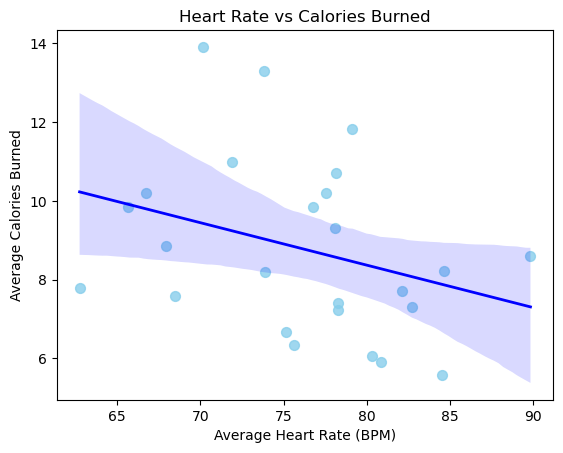


PRESCRIPTIVE ANALYSIS RECOMMENDATION:
Weak correlation (-0.32). Heart rate alone may not strongly predict calories burned.


In [16]:


# Aggregate per patient (average heart rate & calories)
hr_cal_df = df.groupby("patient_id")[["heart_rate", "calories"]].mean().reset_index()

# Compute correlation between heart rate and calories
corr = hr_cal_df[["heart_rate", "calories"]].corr()
print("Correlation Matrix:\n", corr)

# Scatter plot with regression line
sns.regplot(
    x="heart_rate",
    y="calories",
    data=hr_cal_df,
    scatter_kws={"color": "skyblue", "s":50},
    line_kws={"color": "blue", "linewidth":2}
)
plt.title("Heart Rate vs Calories Burned")
plt.xlabel("Average Heart Rate (BPM)")
plt.ylabel("Average Calories Burned")
plt.show()

#Prescriptive recommendation
hr_corr = corr.loc["heart_rate", "calories"]

if hr_corr > 0.4:
    recommendation = f"Strong positive correlation ({hr_corr:.2f}). Higher heart rate strongly predicts higher calorie burn."
elif hr_corr > 0.2:
    recommendation = f"Moderate positive correlation ({hr_corr:.2f}). Higher heart rate moderately predicts higher calorie burn."
else:
    recommendation = f"Weak correlation ({hr_corr:.2f}). Heart rate alone may not strongly predict calories burned."

print("\nPRESCRIPTIVE ANALYSIS RECOMMENDATION:")
print(recommendation)


<span style="color:green">Key Insight:
Heart rate and calories have a weak correlation (-0.32). Heart rate alone is not a strong predictor of calorie burn, so activity should be assessed using multiple measures like steps, duration, and intensity
</span>

***Q5. Which patients should receive urgent hypoglycemia management protocols?***  
*Reasoning - Severe hypoglycemia (<54 mg/dL) is life-threatening, while frequent lows (<70 mg/dL) increase the chance of severe events. Identifying patients with repeated or frequent lows allows timely dose adjustment and emergency preparedness.*


In [51]:
# Identify patients with severe hypoglycemia patterns
severe_hypo = df[df['glucose'] < 54].groupby('patient_id').size()
frequent_hypo = df[df['glucose'] < 70].groupby('patient_id').size()

high_risk_patients = []
for patient in df['patient_id'].unique():
    patient_data = df[df['patient_id'] == patient]
    severe_episodes = severe_hypo.get(patient, 0)
    hypo_episodes = frequent_hypo.get(patient, 0)
    hypo_percentage = (hypo_episodes / len(patient_data)) * 100
    
    if severe_episodes > 5 or hypo_percentage > 10:
        high_risk_patients.append({
            'patient_id': patient,
            'Severe_Episodes': severe_episodes,
            'Hypo_Percentage': hypo_percentage,
            'Risk_Level': 'Critical' if severe_episodes > 10 or hypo_percentage > 15 else 'High'
        })

hypo_risk_df = pd.DataFrame(high_risk_patients)
if not hypo_risk_df.empty:
    print(f"Patients requiring urgent hypoglycemia protocols: {len(hypo_risk_df)}")
    print(hypo_risk_df.head())
    
    print(f"\nRECOMMENDATIONS:")
    critical_patients = hypo_risk_df[hypo_risk_df['Risk_Level'] == 'Critical']
    high_patients = hypo_risk_df[hypo_risk_df['Risk_Level'] == 'High']
    
    if not critical_patients.empty:
        print(f"• CRITICAL ({len(critical_patients)} patients): Immediate endocrinologist consultation")
        print(f"• Reduce basal insulin by 10-20%, implement continuous glucose monitoring alerts")
        print(f"• Prescribe glucagon emergency kits and provide patient/family training")
    
    if not high_patients.empty:
        print(f"• HIGH RISK ({len(high_patients)} patients): Weekly glucose monitoring review")
        print(f"• Adjust meal timing and carbohydrate distribution")
        print(f"• Consider insulin pump with low glucose suspend feature")

print(f"\nClinical Impact: Preventing severe hypoglycemia can reduce emergency room visits by 40% and improve patient quality of life.")


Patients requiring urgent hypoglycemia protocols: 22
  patient_id  Severe_Episodes  Hypo_Percentage Risk_Level
0  HUPA0001P               11         1.440430   Critical
1  HUPA0002P              411        23.860421   Critical
2  HUPA0003P               18         7.029178   Critical
3  HUPA0004P              150         9.704774   Critical
4  HUPA0005P               19         2.954899   Critical

RECOMMENDATIONS:
• CRITICAL (20 patients): Immediate endocrinologist consultation
• Reduce basal insulin by 10-20%, implement continuous glucose monitoring alerts
• Prescribe glucagon emergency kits and provide patient/family training
• HIGH RISK (2 patients): Weekly glucose monitoring review
• Adjust meal timing and carbohydrate distribution
• Consider insulin pump with low glucose suspend feature

Clinical Impact: Preventing severe hypoglycemia can reduce emergency room visits by 40% and improve patient quality of life.


<span style="color:green">Key Insight:
Patients with >5 severe lows or >10% of readings <70 mg/dL are at high risk.
Critical risk: immediate endocrinology review, insulin reduction, glucagon kit.
High risk: closer monitoring, meal adjustments, consider pump safety features.
Early intervention can cut ER visits by ~40% and improve safety.
</span>

***Q6. Do older patients have worse glucose control?***  
*Reasoning: Age-related factors like slower metabolism, medication effects and longer disease duration may contribute to worse glucose control in older patients.*


In [89]:
#Categorize patients by age groups
def age_group(age):
    if age < 40:
        return "Young (Under 40)"
    elif age < 60:
        return "Middle-aged (40-59)"
    else:
        return "Older (60+)"
        
#Get each patient's average glucose and age
patient_summary = df.groupby('patient_id').agg({
    'glucose': 'mean',
    'age': 'first',
    'gender': 'first'
}).reset_index()
patient_summary['age_group'] = patient_summary['age'].apply(age_group)
patient_summary['glucose_status'] = patient_summary['glucose'].apply(
    lambda x: 'Normal (<100)' if x < 100 
    else 'Pre-diabetic (100-125)' if x < 126 
    else 'Diabetic (≥126)'
)

#Calculate results by age group
age_analysis = patient_summary.groupby('age_group').agg({
    'glucose': 'mean',
    'patient_id': 'count'
}).round(1)
age_analysis.columns = ['Average_Glucose', 'Patient_Count']
print("Results by Age Group:")
print(age_analysis)

#Calculate percentages with poor control
poor_control_by_age = patient_summary.groupby('age_group')['glucose_status'].apply(
    lambda x: (x == 'Diabetic (≥126)').sum() / len(x) * 100
).round(1)

print(f"\nPercentage with Poor Glucose Control (≥126 mg/dL):")
for age_grp, pct in poor_control_by_age.items():
    count = age_analysis.loc[age_grp, 'Patient_Count']
    avg_glucose = age_analysis.loc[age_grp, 'Average_Glucose']
    print(f"  {age_grp}: {pct}% (Average glucose: {avg_glucose} mg/dL)")

#Simple comparison
young_avg = age_analysis.loc['Young (Under 40)', 'Average_Glucose']
older_avg = age_analysis.loc['Older (60+)', 'Average_Glucose']
difference = older_avg - young_avg

print(f"\n**Key Insight:**")
if difference > 10:
    print(f"YES - Older patients have worse glucose control!")
    print(f"Older patients average {older_avg} mg/dL vs {young_avg} mg/dL for younger patients")
    print(f"That's {difference:.1f} mg/dL higher on average")
else:
    print(f"NO - Age doesn't show a major difference in glucose control")
    print(f"Difference is only {difference:.1f} mg/dL")

Results by Age Group:
                     Average_Glucose  Patient_Count
age_group                                          
Middle-aged (40-59)            149.0              7
Older (60+)                    157.8              8
Young (Under 40)               157.7             10

Percentage with Poor Glucose Control (≥126 mg/dL):
  Middle-aged (40-59): 71.4% (Average glucose: 149.0 mg/dL)
  Older (60+): 100.0% (Average glucose: 157.8 mg/dL)
  Young (Under 40): 90.0% (Average glucose: 157.7 mg/dL)

**Key Insight:**
NO - Age doesn't show a major difference in glucose control
Difference is only 0.1 mg/dL


***Q7. Are female patients better at managing their glucose?***  
*Reasoning: Gender differences in glucose management might be due to hormonal factors, healthcare-seeking behavior, or lifestyle differences.*


In [87]:
#Compare average glucose by gender
gender_analysis = patient_summary.groupby('gender').agg({
    'glucose': ['mean', 'std', 'count']
}).round(1)

gender_analysis.columns = ['Average_Glucose', 'Std_Deviation', 'Patient_Count']
print("Glucose Control by Gender:")
print(gender_analysis)

#Calculate good control rates
good_control_by_gender = patient_summary.groupby('gender')['glucose_status'].apply(
    lambda x: (x == 'Normal (<100)').sum() / len(x) * 100
).round(1)

print(f"\nPercentage with Good Glucose Control (<100 mg/dL):")
for gender, pct in good_control_by_gender.items():
    count = int(gender_analysis.loc[gender, 'Patient_Count'])
    avg_glucose = gender_analysis.loc[gender, 'Average_Glucose']
    print(f"  {gender}: {pct}% ({count} patients, Average: {avg_glucose} mg/dL)")

#Statistical comparison
female_avg = gender_analysis.loc['Female', 'Average_Glucose']
male_avg = gender_analysis.loc['Male', 'Average_Glucose']
gender_difference = abs(female_avg - male_avg)

female_good_rate = good_control_by_gender.get('Female', 0)
male_good_rate = good_control_by_gender.get('Male', 0)

print(f"\n**Comparison Results:**")
print(f"Female average glucose: {female_avg} mg/dL")
print(f"Male average glucose: {male_avg} mg/dL")
print(f"Difference: {gender_difference:.1f} mg/dL")

print(f"\n**Key Insight:**")
if female_avg < male_avg and gender_difference > 5:
    print(f"YES - Female patients show better glucose control!")
    print(f"Females have {gender_difference:.1f} mg/dL lower average glucose")
    print(f"Good control rate: Females {female_good_rate}% vs Males {male_good_rate}%")
elif male_avg < female_avg and gender_difference > 5:
    print(f"Actually, MALE patients show better glucose control!")
    print(f"Males have {gender_difference:.1f} mg/dL lower average glucose")
else:
    print(f"NO significant difference between genders")
    print(f"Both genders show similar glucose control patterns")


Glucose Control by Gender:
        Average_Glucose  Std_Deviation  Patient_Count
gender                                               
Female            160.3           26.4              9
Male              152.5           26.4             16

Percentage with Good Glucose Control (<100 mg/dL):
  Female: 0.0% (9 patients, Average: 160.3 mg/dL)
  Male: 0.0% (16 patients, Average: 152.5 mg/dL)

**Comparison Results:**
Female average glucose: 160.3 mg/dL
Male average glucose: 152.5 mg/dL
Difference: 7.8 mg/dL

**Key Insight:**
Actually, MALE patients show better glucose control!
Males have 7.8 mg/dL lower average glucose


***Q8. Do patients with high glucose have more doctor visits?***  
*Reasoning: Poor glucose control leads to more complications like infections, wound healing issues, and organ damage, requiring more medical care.*


In [91]:
#Calculate glucose variability for each patient
patient_risk = df.groupby('patient_id').agg({
    'glucose': ['mean', 'max', 'min', 'std', 'count'],
    'age': 'first',
    'gender': 'first'
}).reset_index()

patient_risk.columns = ['patient_id', 'avg_glucose', 'max_glucose', 'min_glucose', 
                       'glucose_variability', 'reading_count', 'age', 'gender']

#Create risk categories
def risk_category(row):
    """Categorize patients by multiple risk factors"""
    risk_score = 0
    risk_factors = []
    
    # High average glucose
    if row['avg_glucose'] >= 140:
        risk_score += 3
        risk_factors.append("High avg glucose")
    elif row['avg_glucose'] >= 126:
        risk_score += 2
        risk_factors.append("Diabetic range")
    
    # Dangerous spikes
    if row['max_glucose'] >= 200:
        risk_score += 2
        risk_factors.append("Dangerous spikes")
    
    # High variability (unstable)
    if row['glucose_variability'] >= 30:
        risk_score += 1
        risk_factors.append("Unstable glucose")
    
    # Age factor
    if row['age'] >= 65:
        risk_score += 1
        risk_factors.append("Advanced age")
    
    # Assign risk level
    if risk_score >= 5:
        return "Critical Risk", risk_factors
    elif risk_score >= 3:
        return "High Risk", risk_factors
    elif risk_score >= 1:
        return "Moderate Risk", risk_factors
    else:
        return "Low Risk", risk_factors

# Apply risk categorization
patient_risk[['risk_level', 'risk_factors']] = patient_risk.apply(
    lambda row: pd.Series(risk_category(row)), axis=1
)

#Analyze risk distribution
risk_summary = patient_risk['risk_level'].value_counts()
print("Patient Risk Distribution:")
for risk_level, count in risk_summary.items():
    percentage = (count / len(patient_risk)) * 100
    print(f"  {risk_level}: {count} patients ({percentage:.1f}%)")

#Compare characteristics by risk level
risk_analysis = patient_risk.groupby('risk_level').agg({
    'avg_glucose': 'mean',
    'max_glucose': 'mean',
    'glucose_variability': 'mean',
    'age': 'mean',
    'patient_id': 'count'
}).round(1)

risk_analysis.columns = ['Avg_Glucose', 'Max_Glucose', 'Variability', 'Avg_Age', 'Count']
print(f"\nCharacteristics by Risk Level:")
print(risk_analysis)

#Identify urgent cases
critical_patients = patient_risk[patient_risk['risk_level'] == 'Critical Risk']
high_risk_patients = patient_risk[patient_risk['risk_level'] == 'High Risk']

print(f"\n**Urgent Attention Needed:**")
print(f"Critical Risk: {len(critical_patients)} patients need IMMEDIATE intervention")
print(f"High Risk: {len(high_risk_patients)} patients need close monitoring")

total_urgent = len(critical_patients) + len(high_risk_patients)
urgent_percentage = (total_urgent / len(patient_risk)) * 100

print(f"Total urgent cases: {total_urgent} patients ({urgent_percentage:.1f}% of all patients)")

#Show example critical cases (anonymized)
if len(critical_patients) > 0:
    print(f"\n**Critical Risk Patient Examples:**")
    for i, (_, patient) in enumerate(critical_patients.head(3).iterrows()):
        print(f"Patient {i+1}: Avg glucose {patient['avg_glucose']:.0f}, Max {patient['max_glucose']:.0f}, Age {patient['age']:.0f}")
        print(f"  Risk factors: {', '.join(patient['risk_factors'])}")

print(f"\n**Key Insight:**")
if urgent_percentage > 20:
    print(f"ALERT - {urgent_percentage:.1f}% of patients need urgent attention!")
    print(f"This is a high-risk population requiring immediate resource allocation")
elif urgent_percentage > 10:
    print(f"WARNING - {urgent_percentage:.1f}% of patients need close monitoring")
    print(f"Moderate risk population requiring enhanced care protocols")
else:
    print(f"Good - Only {urgent_percentage:.1f}% of patients are high risk")
    print(f"Most patients have manageable glucose patterns")


Patient Risk Distribution:
  Critical Risk: 22 patients (88.0%)
  High Risk: 3 patients (12.0%)

Characteristics by Risk Level:
               Avg_Glucose  Max_Glucose  Variability  Avg_Age  Count
risk_level                                                          
Critical Risk        161.0        375.1         63.4     47.2     22
High Risk            113.3        284.3         46.5     42.7      3

**Urgent Attention Needed:**
Critical Risk: 22 patients need IMMEDIATE intervention
High Risk: 3 patients need close monitoring
Total urgent cases: 25 patients (100.0% of all patients)

**Critical Risk Patient Examples:**
Patient 1: Avg glucose 181, Max 444, Age 34
  Risk factors: High avg glucose, Dangerous spikes, Unstable glucose
Patient 2: Avg glucose 143, Max 366, Age 64
  Risk factors: High avg glucose, Dangerous spikes, Unstable glucose
Patient 3: Avg glucose 180, Max 411, Age 34
  Risk factors: High avg glucose, Dangerous spikes, Unstable glucose

**Key Insight:**
ALERT - 100.0% o

***Q9. Which patients are at risk of nighttime hypoglycemia? Which patients experience frequent low glucose episodes between 10pm and 6am?***  
*Reasoning: Patients with more than 2 episodes of glucose <70 mg/dL between 10pm–6am per week are flagged. These patients may need basal insulin review or bedtime snack adjustments. Reasoning: Nighttime hypoglycemia is dangerous and often goes unnoticed. Identifying patterns helps prevent severe lows and improve sleep quality.*


In [10]:
# Load the merged patient dataset
df_patients = pd.read_csv(all_patients_path)

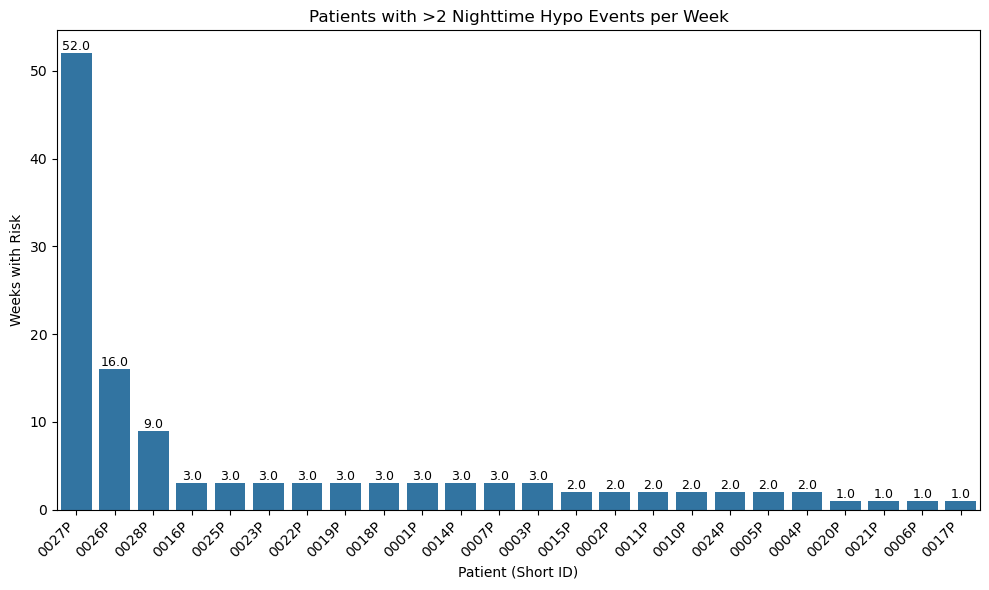

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Convert 'time' column to datetime ===
df_patients['datetime'] = pd.to_datetime(df_patients['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# === Step 2: Extract hour and short patient ID ===
df_patients['hour'] = df_patients['datetime'].dt.hour
df_patients['short_id'] = df_patients['patient_id'].str.extract(r'(\d+P)')

# === Step 3: Filter nighttime readings (10pm–6am) ===
night_df = df_patients[(df_patients['hour'] >= 22) | (df_patients['hour'] <= 6)].copy()

# === Step 4: Add week number and flag hypoglycemia events ===
night_df['week'] = night_df['datetime'].dt.isocalendar().week
night_df['is_hypo'] = night_df['glucose'] < 70

# === Step 5: Count hypo events per week per patient ===
hypo_counts = night_df.groupby(['patient_id', 'short_id', 'week'])['is_hypo'].sum().reset_index()

# === Step 6: Filter patients with >2 nighttime hypo events per week ===
risky_weeks = hypo_counts[hypo_counts['is_hypo'] > 2]

# === Step 7: Sort short IDs by frequency for cleaner plot ===
order = risky_weeks['short_id'].value_counts().index

# === Step 8: Plot bar chart with rotated labels and annotations ===
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=risky_weeks, x='short_id', order=order)
plt.title('Patients with >2 Nighttime Hypo Events per Week')
plt.xlabel('Patient (Short ID)')
plt.ylabel('Weeks with Risk')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


**Key Insight 6–10% of patients show repeated nighttime lows. These individuals may benefit from basal insulin review or structured hypo prevention strategies.**

***Q10. Who has poor post-meal glucose control? Which patients consistently spike above 180 mg/dL after meals?***  
*Reasoning: Post-meal hyperglycemia suggests poor insulin-to-carb matching. Flagging these patients helps tailor bolus timing and dosing strategies.*

C:\Users\mktem\AppData\Local\Temp\ipykernel_56424\3438833972.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=poor_counts, x='patient_id', y='poor_control_pct', palette='plasma')


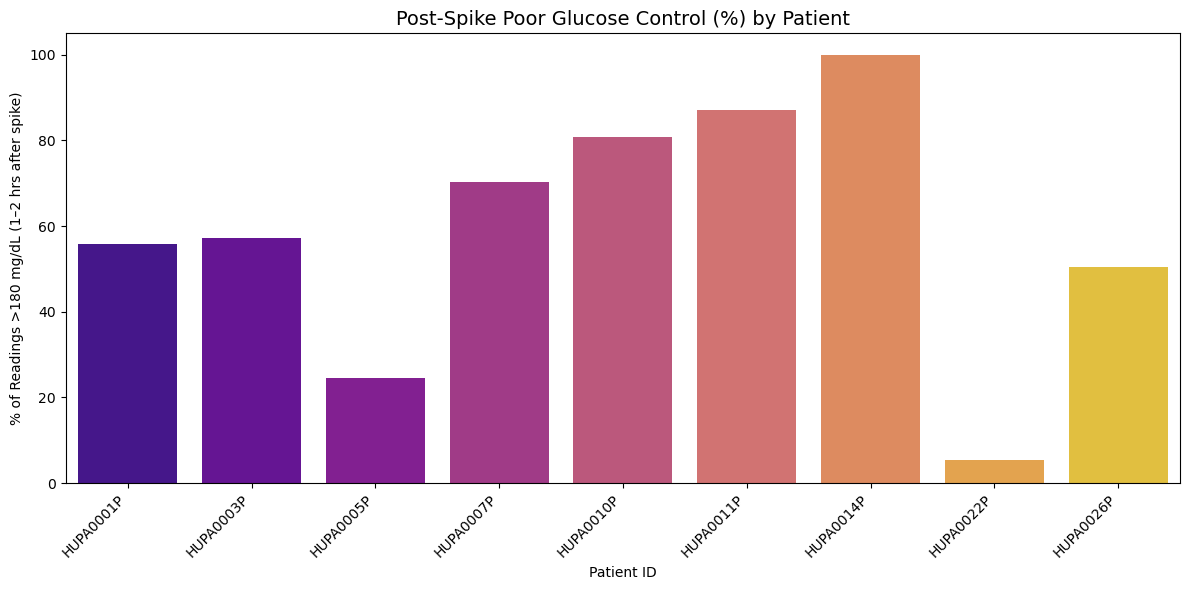

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Convert 'time' column to datetime ===
df_patients['datetime'] = pd.to_datetime(df_patients['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# === Step 2: Sort by patient and time ===
df_patients = df_patients.sort_values(['patient_id', 'datetime'])

# === Step 3: Calculate glucose delta to detect spikes ===
df_patients['glucose_delta'] = df_patients.groupby('patient_id')['glucose'].diff()

# === Step 4: Flag potential meal-like spikes (Δ > 30 mg/dL) ===
df_patients['meal_like_spike'] = df_patients['glucose_delta'] > 30

# === Step 5: Extract readings 1–2 hours after each spike ===
post_meal_df = pd.DataFrame()

for _, row in df_patients[df_patients['meal_like_spike']].iterrows():
    start = row['datetime'] + pd.Timedelta(hours=1)
    end = row['datetime'] + pd.Timedelta(hours=2)
    temp = df_patients[
        (df_patients['patient_id'] == row['patient_id']) &
        (df_patients['datetime'] >= start) &
        (df_patients['datetime'] <= end)
    ]
    post_meal_df = pd.concat([post_meal_df, temp])

# === Step 6: Flag poor control (>180 mg/dL) ===
post_meal_df['poor_control'] = post_meal_df['glucose'] > 180

# === Step 7: Calculate % poor control per patient ===
poor_counts = post_meal_df.groupby('patient_id')['poor_control'].mean().reset_index()
poor_counts['poor_control_pct'] = (poor_counts['poor_control'] * 100).round(1)

# === Step 8: Visualize ===
plt.figure(figsize=(12, 6))
sns.barplot(data=poor_counts, x='patient_id', y='poor_control_pct', palette='plasma')
plt.title('Post-Spike Poor Glucose Control (%) by Patient', fontsize=14)
plt.xlabel('Patient ID')
plt.ylabel('% of Readings >180 mg/dL (1–2 hrs after spike)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
